# Proyek Machine Learning : Predictive Analytics
**Domain** : Kesehatan

**Tujuan** : Tujuan dari dataset ini adalah untuk memprediksi kemungkinan seseorang mengalami stroke berdasarkan informasi karakteristik dan kondisi kesehatannya, seperti jenis kelamin, usia, riwayat penyakit tertentu (seperti diabetes atau hipertensi), dan status merokok. Dengan menggunakan dataset ini, dapat dikembangkan model prediksi yang membantu para profesional kesehatan dalam mengidentifikasi individu yang berisiko tinggi terkena stroke, sehingga mereka bisa mendapatkan penanganan dan pencegahan yang lebih tepat dan lebih dini.

**Dataset yang digunakan** : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from pandas import read_csv

# DATA UNDERSTANDING

**Memuat Dataset Engineering_graduate_salary.csv pada variabel "df"**

In [2]:
#!/bin/bash
!kaggle datasets download fedesoriano/stroke-prediction-dataset -p "/content/drive/MyDrive/" --unzip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 22.4MB/s]


In [3]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

**Menampilkan tipe data setiap kolom pada dataset "df"**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


**Menghapus(drop) kolom/fitur yang tidak diperlukan**

In [5]:
df.drop(
    ['id'],
    axis='columns',
    inplace=True
)

**Menampilkan tipe data setiap kolom pada dataset "df" setelah proses drop**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


**Deskripsi Variabel Numerik**

In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Mendapatkan ukuran(shape) dari dataset**

In [8]:
df.shape

(5110, 11)

**Melakukan pemeriksaan terhadap nilai yang hilang(missing value) pada dataset**

In [9]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


Menghapus Baris dengan Nilai NaN

In [10]:
df.dropna(subset=['bmi'], inplace=True)

In [11]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


Memvisualisasikan data menggunakan boxplot untuk fitur numerik: [age,hypertension, heart_disease, avg_glucose_level, bmi]

<Axes: xlabel='age'>

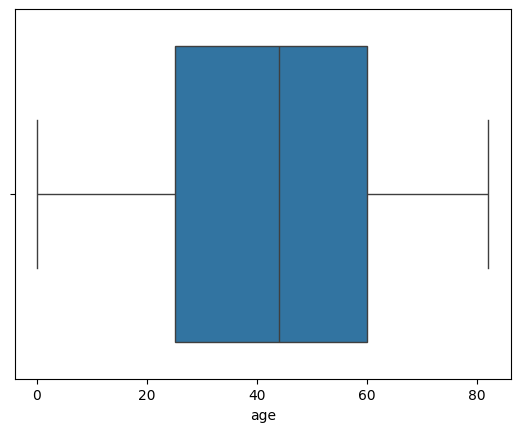

In [12]:
sns.boxplot(x=df['age'])

<Axes: xlabel='avg_glucose_level'>

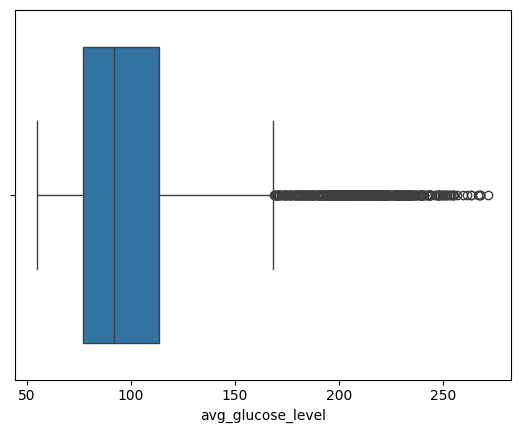

In [13]:
sns.boxplot(x=df['avg_glucose_level'])

<Axes: xlabel='bmi'>

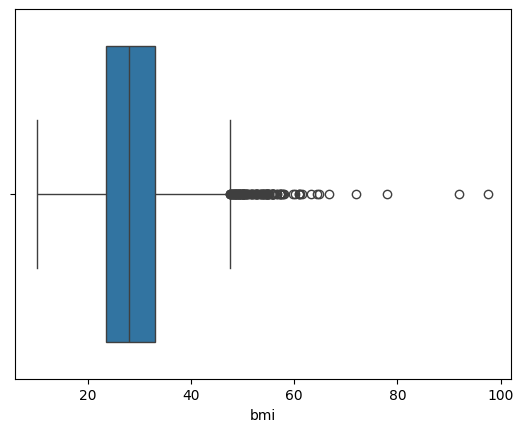

In [14]:
sns.boxplot(x=df['bmi'])

<Axes: xlabel='hypertension'>

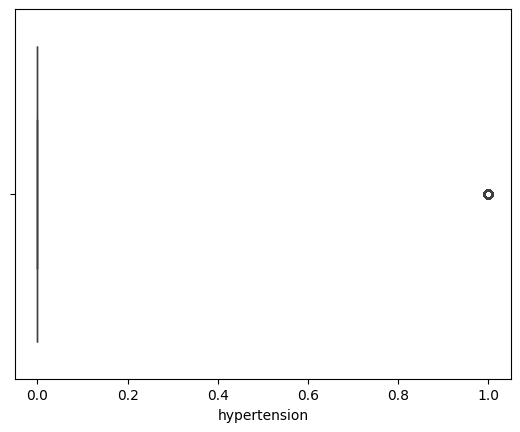

In [15]:
sns.boxplot(x=df['hypertension'])

<Axes: xlabel='heart_disease'>

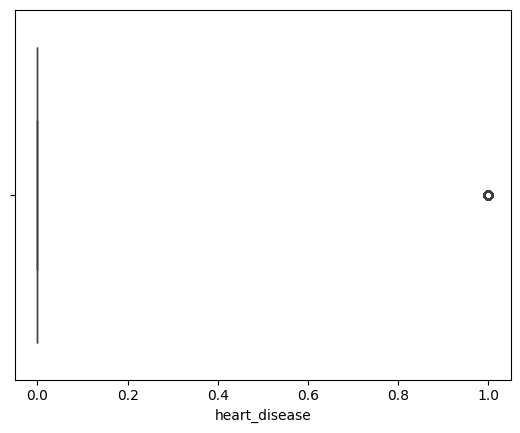

In [16]:
sns.boxplot(x=df['heart_disease'])

In [17]:
df.shape

(4909, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


Menganalisa data menggunakan Univariate Analysis
Membagi fitur numerik dan kategorik yang terdapat pada dataset

In [20]:
category_feature = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numberic_feature = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

Melakukan analisa fitur kategori

        Count  Percent
gender                
Female   2897     59.0
Male     2011     41.0
Other       1      0.0


<Axes: title={'center': 'gender'}, xlabel='gender'>

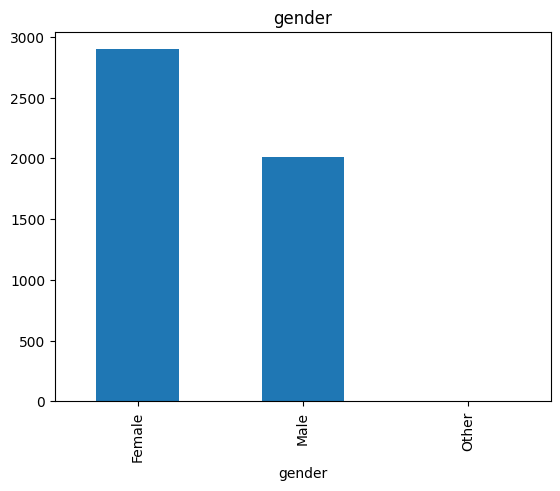

In [21]:
feature = category_feature[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({
    'Count': count,
    'Percent': percent.round(1)
})
print(df1)
count.plot(kind='bar', title=feature)

In [22]:
df = df[df['gender'] != 'Other']

Menganalisa fitur gender dimana gender other sudah dihilangkan

        Count  Percent
gender                
Female   2897     59.0
Male     2011     41.0


<Axes: title={'center': 'gender'}, xlabel='gender'>

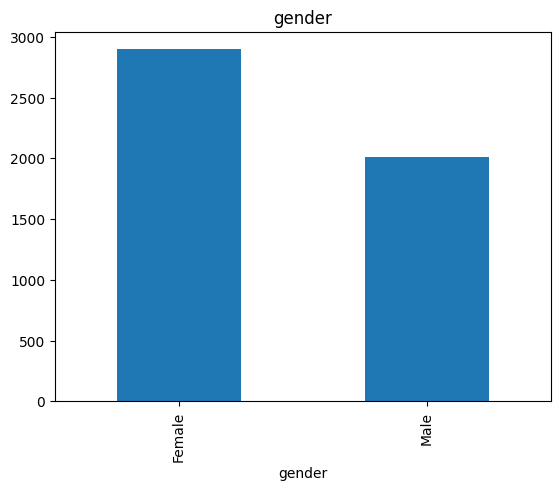

In [23]:
feature = category_feature[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({
    'Count': count,
    'Percent': percent.round(1)
})
print(df1)
count.plot(kind='bar', title=feature)

menganalisa fitur ever maried

              Count  Percent
ever_married                
Yes            3204     65.3
No             1704     34.7


<Axes: title={'center': 'ever_married'}, xlabel='ever_married'>

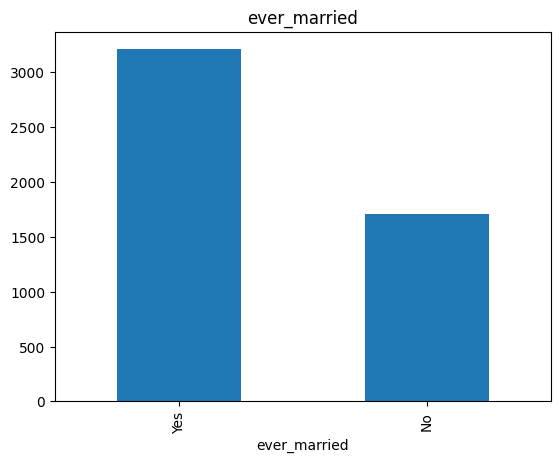

In [24]:
feature = category_feature[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({
    'Count': count,
    'Percent': percent.round(1)
})
print(df1)
count.plot(kind='bar', title=feature)

Menganalisa fitur work_type

               Count  Percent
work_type                    
Private         2810     57.3
Self-employed    775     15.8
children         671     13.7
Govt_job         630     12.8
Never_worked      22      0.4


<Axes: title={'center': 'work_type'}, xlabel='work_type'>

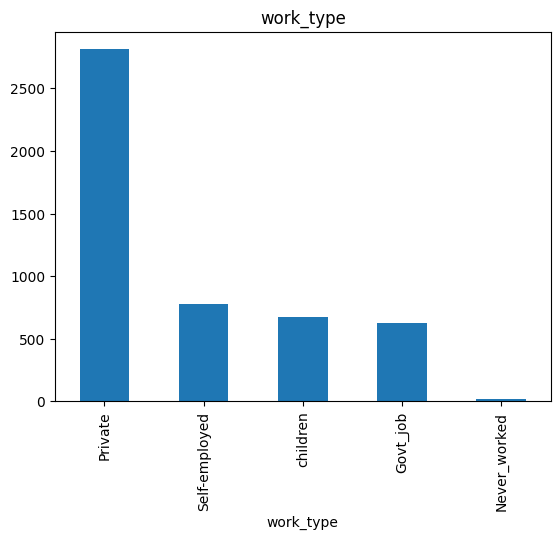

In [25]:
feature = category_feature[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({
    'Count': count,
    'Percent': percent.round(1)
})
print(df1)
count.plot(kind='bar', title=feature)

Menganalisa feature residence type

                Count  Percent
Residence_type                
Urban            2490     50.7
Rural            2418     49.3


<Axes: title={'center': 'Residence_type'}, xlabel='Residence_type'>

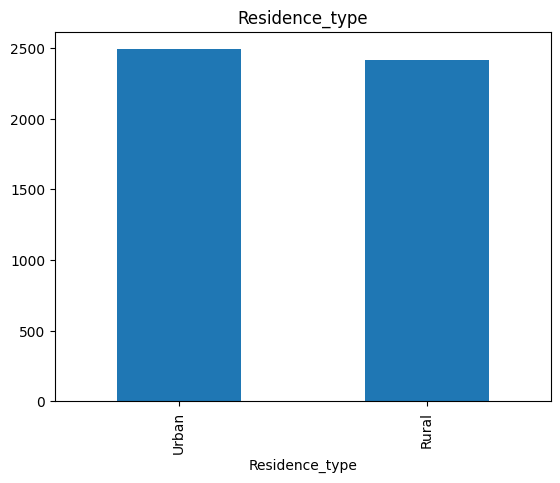

In [26]:
feature = category_feature[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({
    'Count': count,
    'Percent': percent.round(1)
})
print(df1)
count.plot(kind='bar', title=feature)

Menganalisa feature smoking status

                 Count  Percent
smoking_status                 
never smoked      1852     37.7
Unknown           1483     30.2
formerly smoked    836     17.0
smokes             737     15.0


<Axes: title={'center': 'smoking_status'}, xlabel='smoking_status'>

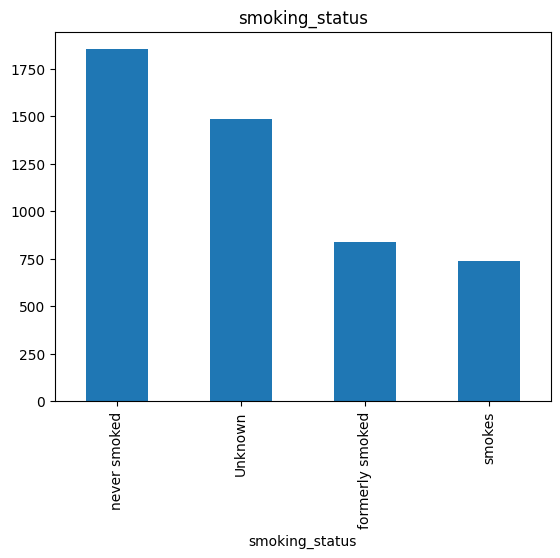

In [27]:
feature = category_feature[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({
    'Count': count,
    'Percent': percent.round(1)
})
print(df1)
count.plot(kind='bar', title=feature)

Menganalisa data menggunakan Multivariate Analysis

<ipython-input-28-e7d804a2aa42>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4,
<ipython-input-28-e7d804a2aa42>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4,
<ipython-input-28-e7d804a2aa42>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4,
<ipython-input-28-e7d804a2aa42>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14

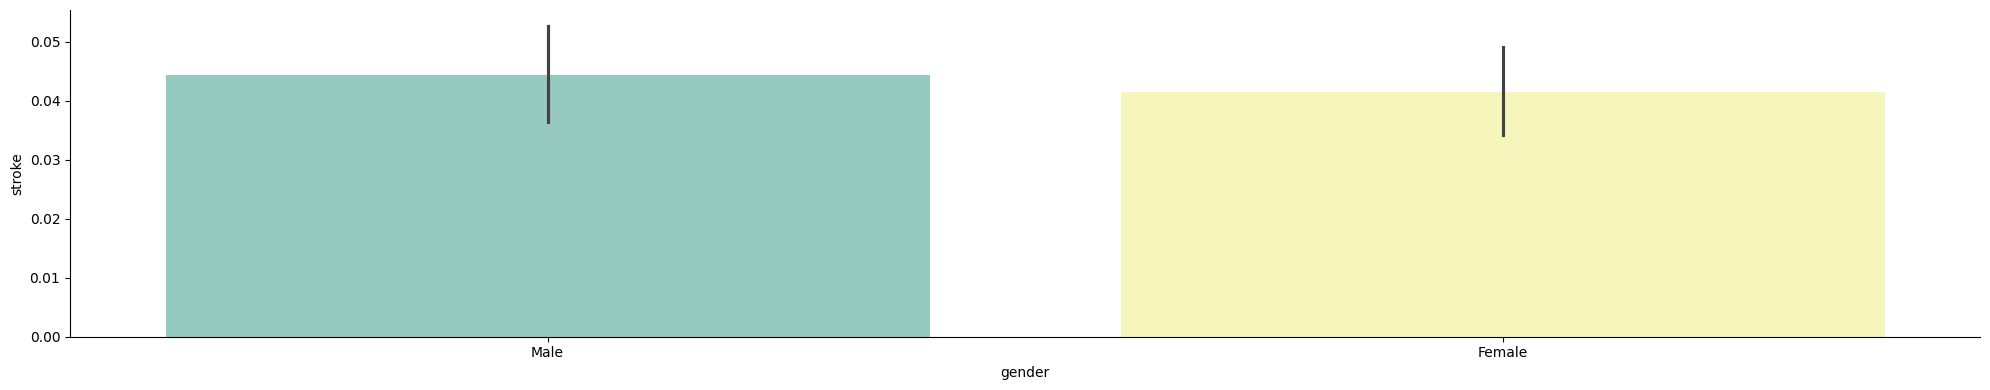

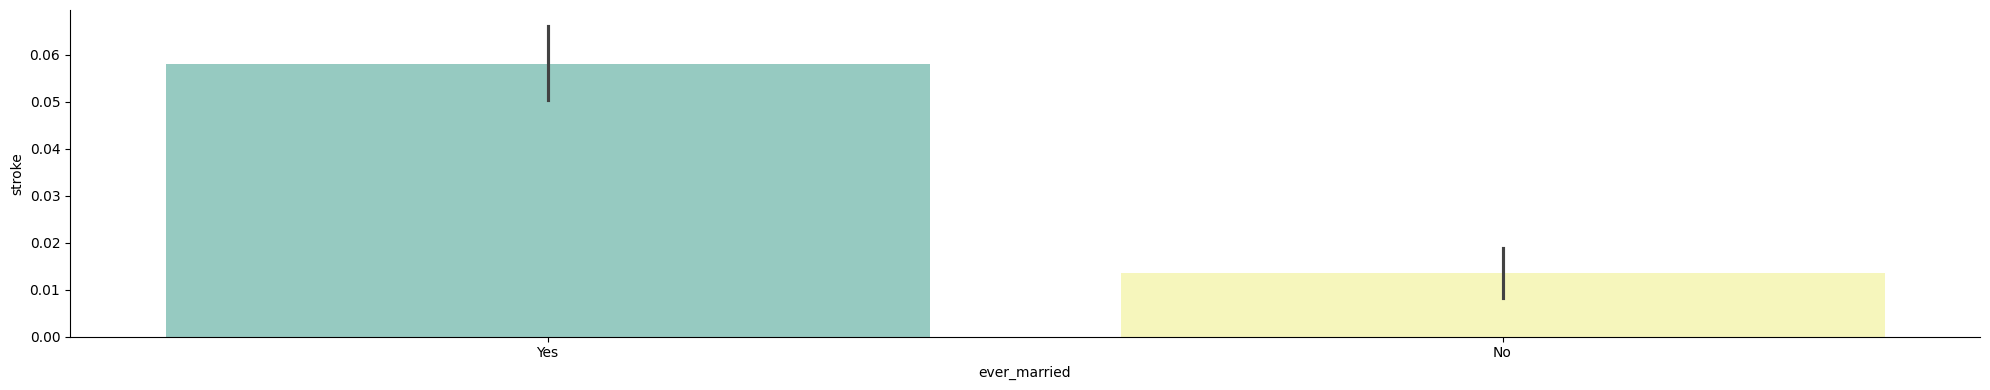

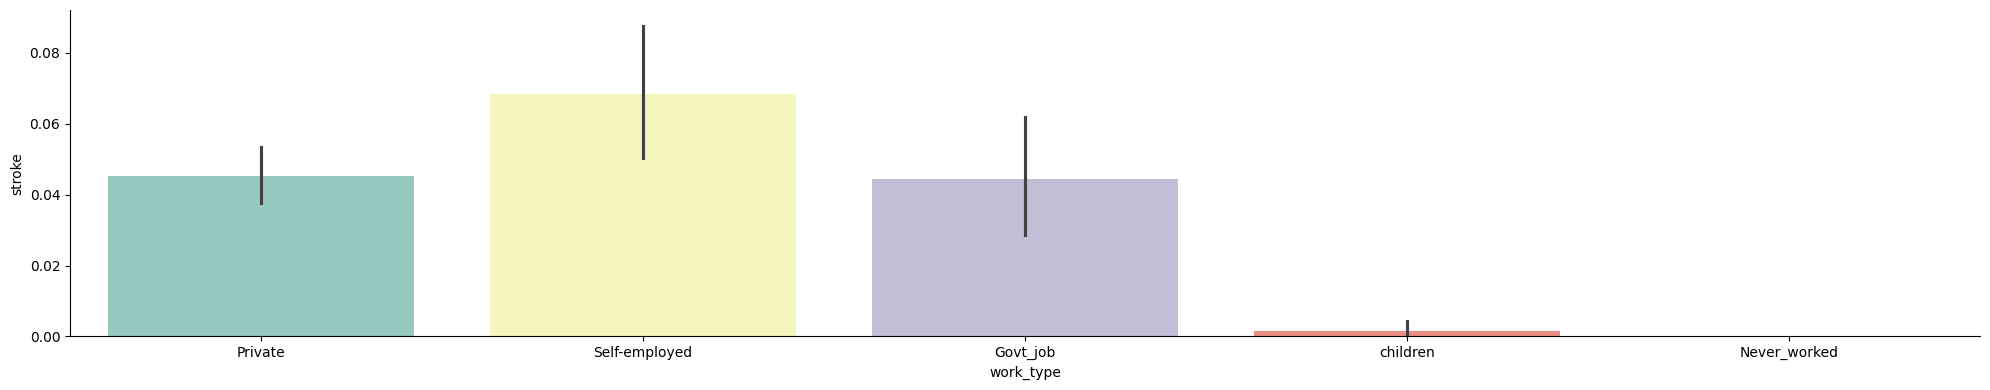

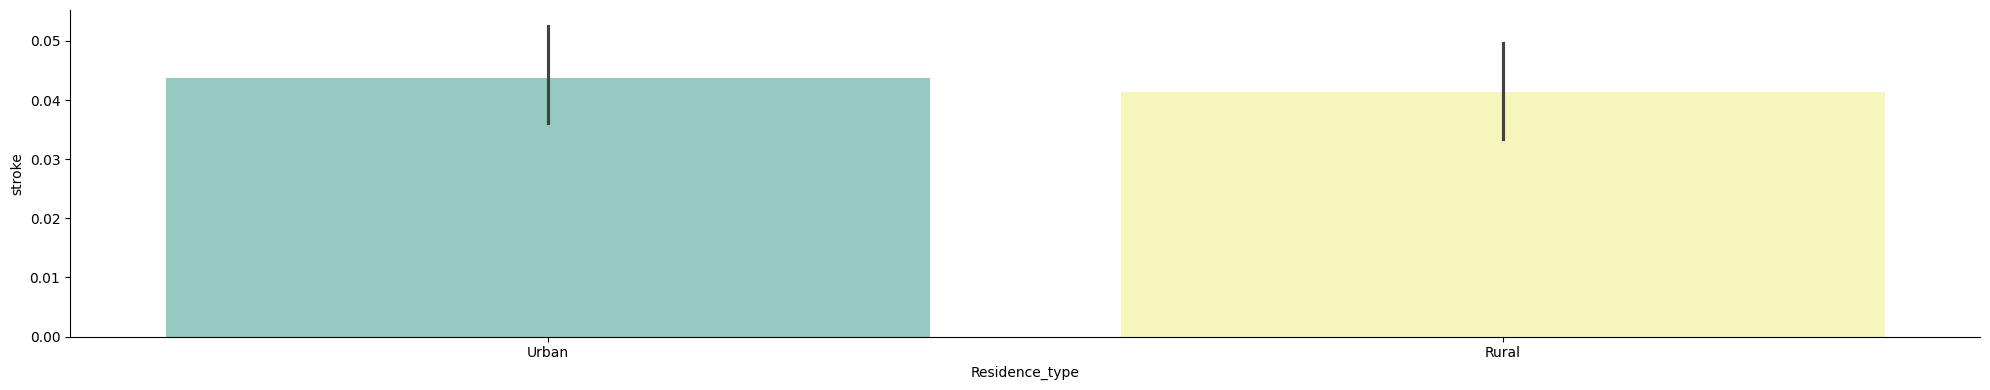

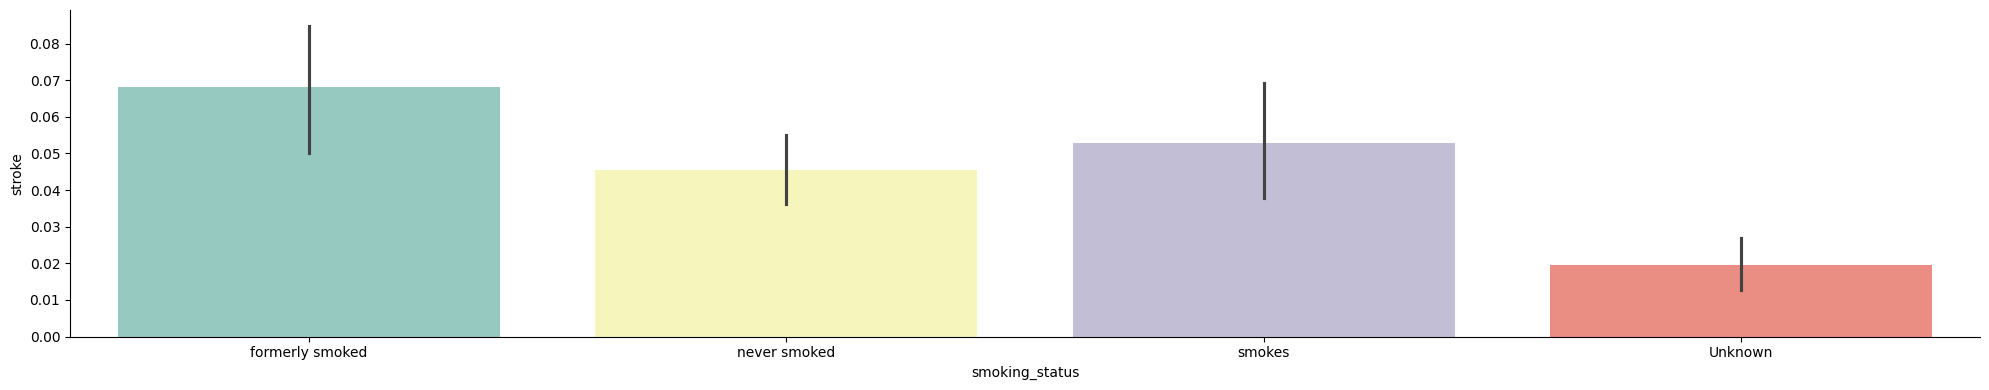

In [28]:
#menganalisa data feature categoric dan numeric
category = df.select_dtypes(include=['object']).columns.tolist()

for col in category:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4,
              aspect = 5, data=df, palette="Set3")

Menampilkan Plot Pair fitur numerik

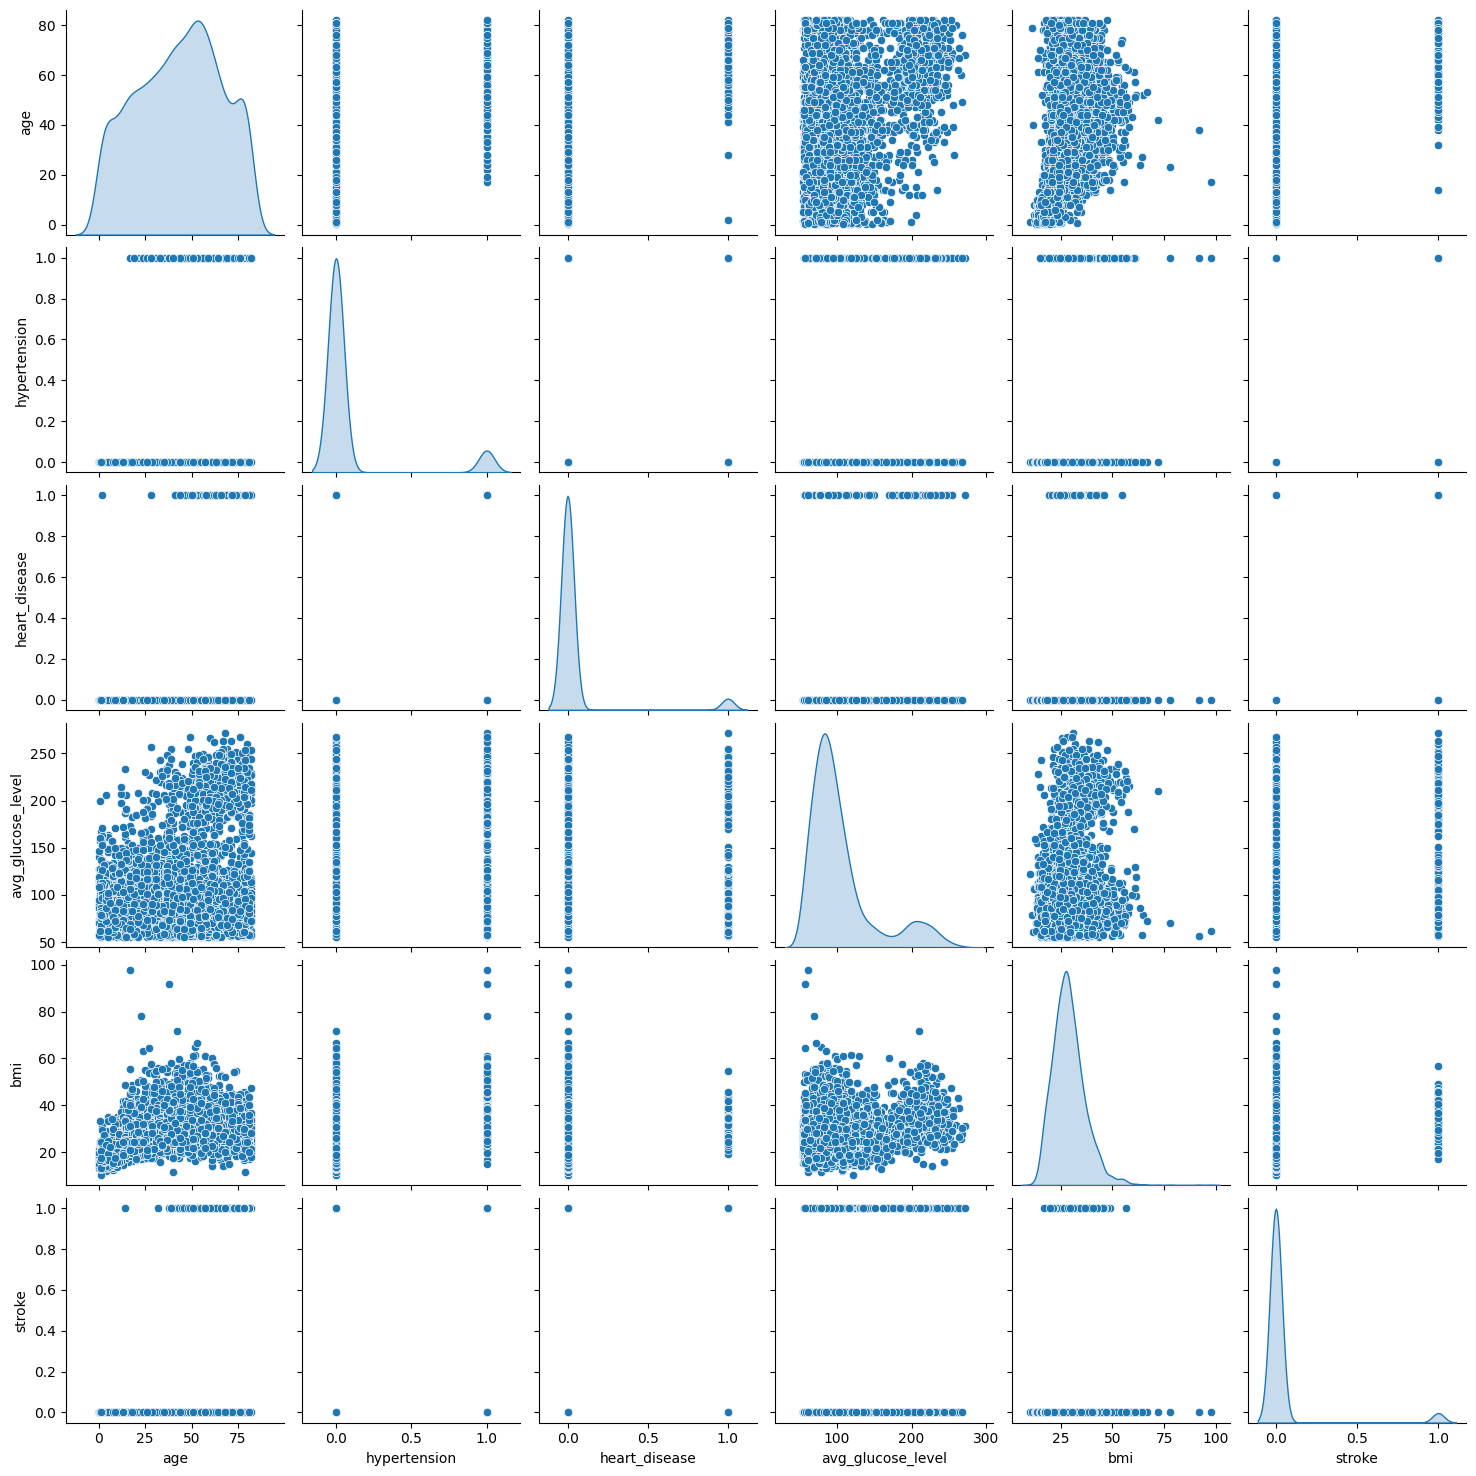

In [29]:
sns.pairplot(df, diag_kind='kde')

Melakukan pengamatan terhadap tingkat korelasi dengan menggunakan matrik korelasi pada tiap fitur

In [30]:
category_feature = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
#konversi category_feature ke numberic
df[category_feature] = df[category_feature].apply(lambda col: pd.Categorical(col).codes)

Text(0.5, 1.0, 'Matrik Korelasi fitur numerik')

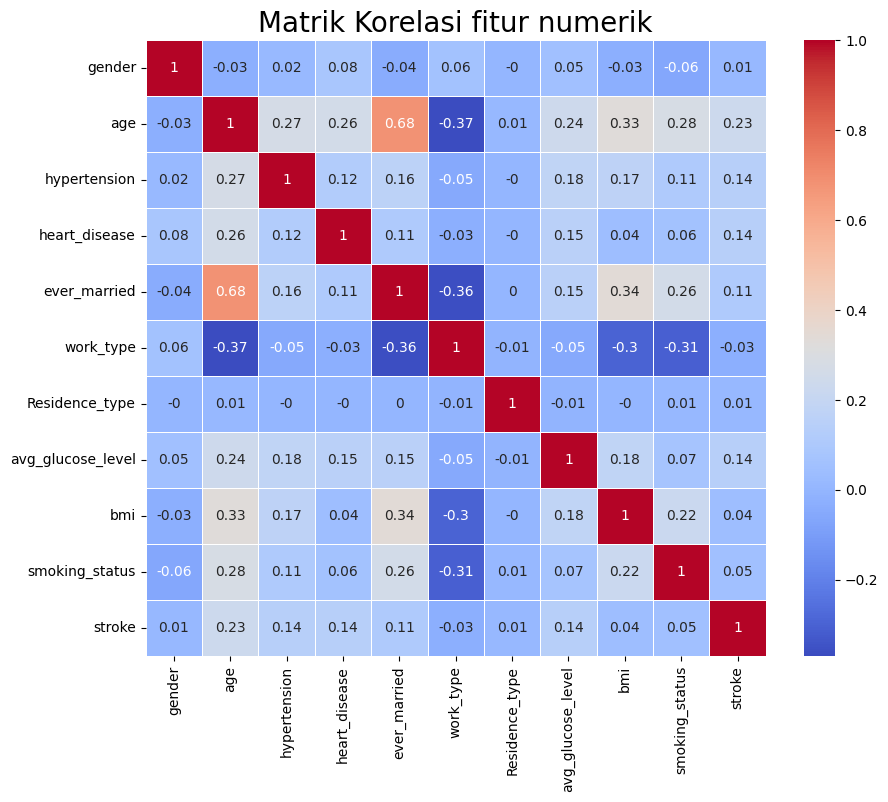

In [31]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title("Matrik Korelasi fitur numerik", size=20)

### **DATA PREPARATION**

Langkah selanjutnya melakukan pembagian data atau split data pada data train dengan perbandingan 80:20, kemudian melakukan standarisasi data.

In [34]:
#pembagian data train sebesar 80:20
from sklearn.model_selection import train_test_split
X = df.drop(['stroke'], axis=1)
y = df['stroke']
from sklearn.model_selection import train_test_split

# Bagi dataset menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Cek jumlah data latih dan uji
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")

Jumlah data latih: 3926
Jumlah data uji: 982


In [36]:
#Melakukan standarisasi dengan StandardScaler pada data latih carat, table, dimension.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#Menampilkan Hasil standarisasi dengan tabel
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,-0.833326,-0.129396,-0.319671,-0.225514,0.724334,-0.139334,0.991882,-0.888151,0.301936,0.585162
1,-0.833326,0.716733,-0.319671,-0.225514,0.724334,0.770856,0.991882,-0.529584,0.506666,-1.290222
2,-0.833326,0.494068,-0.319671,-0.225514,0.724334,-0.139334,0.991882,-0.118597,-0.785692,-0.352530
3,1.200010,1.696462,-0.319671,-0.225514,0.724334,0.770856,0.991882,-0.765917,-0.632145,-0.352530
4,-0.833326,-1.420855,-0.319671,-0.225514,-1.380578,1.681046,0.991882,-0.799809,-1.847729,-1.290222


**Menangani Ketidakseimbangan Data dengan Teknik seperti SMOTE**
SMOTE (Synthetic Minority Over-sampling Technique) digunakan untuk membuat sampel sintetis pada kelas minoritas.

In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

### **Model Development**

Dalam melakukan pemodelan Stroke Prediction Analytics Klasifikasi saya memilih model klasifikasi karena variabel target berupa kalsifikasi rentang nilai 0 - 1 yang menentukan apakah seseorang akan mengalami stroke atau tidak.

Adapun model klasifikasi yang akan saya pilih adalah Random Forest klasifikasi dan Support Vektor Machine dengan melakukan optimasi pada kedua model tersebut menggunakan Hyperparameter GridSearch.

1. Model Random Forest

In [48]:

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data latih
model_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

**Evaluasi Model Random Forest**

In [49]:
# Prediksi pada data uji
y_pred_rf = model_rf.predict(X_test_scaled)

# Evaluasi model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       929
           1       0.09      0.06      0.07        53

    accuracy                           0.92       982
   macro avg       0.52      0.51      0.51       982
weighted avg       0.90      0.92      0.91       982

[[900  29]
 [ 50   3]]


Dari hasil evaluasi diatas model random forest memiliki hasil akurasi sebesar 95%. hasil ini akan kita tingkatkan dengan optimasi menggunakan Hyperparameter GridSearch.

**Confusion Matrix.**

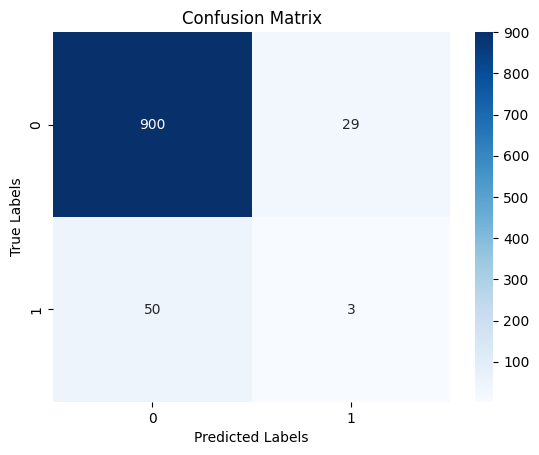

In [50]:
#Melihat Confusion Matrix dengan warna cerah
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

2. Hyperparameter Model Random Forest dengan GridSearch

Parameter yang digunakan untuk optimasi model random forest menggunakan GridSearch yaitu:

'n_estimators': [50, 100, 200]
'max_depth': [None, 10, 20, 30]
'min_samples_split': [2, 5, 10]
dari parameter diatas akan dicari nilai parameter terbaik menggunakan GridSearch untuk model klasifikasi random forest.

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters dan evaluasi ulang model
print(grid_search.best_params_)
y_pred_best_rf = grid_search.best_estimator_.predict(X_test_scaled)
print(classification_report(y_test, y_pred_best_rf))

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       929
           1       0.10      0.06      0.07        53

    accuracy                           0.92       982
   macro avg       0.53      0.51      0.52       982
weighted avg       0.90      0.92      0.91       982



Hasil parameter terbaik dari Hyperparameter GridSearch yaitu:

'max_depth': none
'min_samples_split': 10
'n_estimators': 200


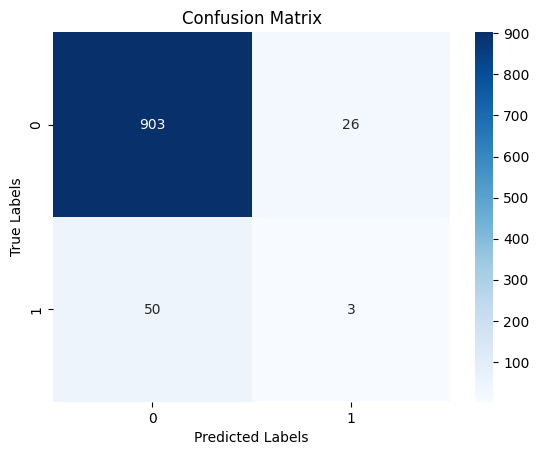

In [53]:
#Melihat Confusion Matrix dengan warna cerah
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

3. Model Support Vektor Machine

In [54]:
from sklearn.svm import SVC
# Inisialisasi model SVM
model_svm = SVC(kernel='rbf', random_state=42)

# Latih model
model_svm.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [55]:
# Prediksi data uji
from sklearn.metrics import accuracy_score, classification_report

y_pred_svm = model_svm.predict(X_test)

# Evaluasi performa model
print(f"Akurasi: {accuracy_score(y_test, y_pred_svm)}")
print(classification_report(y_test, y_pred_svm))

Akurasi: 0.9460285132382892
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dari hasil evaluasi diatas model SVM memiliki hasil akurasi sebesar 95%. hasil yang cukup tinggi dan melebihi nilai akurasi dari model random forest. Selanjutnya hasil ini akan kita tingkatkan dengan optimasi yang sama sebelumnya yaitu menggunakan Hyperparameter GridSearch.

**Confusion Matrix**

Text(50.722222222222214, 0.5, 'True Labels')

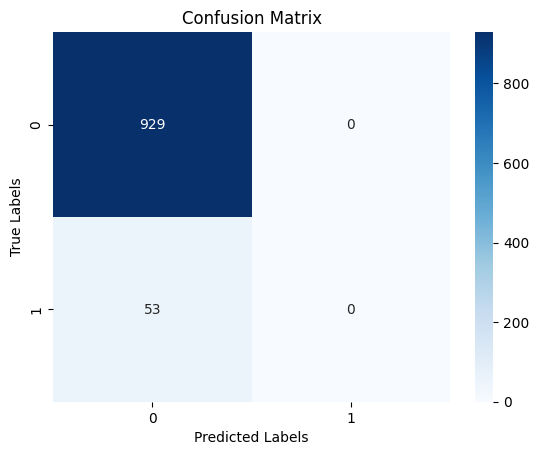

In [56]:
#Confusion Matrix Model SVM
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Hyperparameter Model Support Vektor Machine dengan GridSearch

Parameter yang digunakan untuk optimasi model Support Vektor Machine menggunakan GridSearch yaitu:

- 'C': [0.1, 1, 10]
- 'gamma': [1, 0.1, 0.01]
- 'kernel': ['linear', 'poly', 'rbf']

Dari parameter diatas akan dicari nilai parameter terbaik menggunakan GridSearch untuk model klasifikasi support vektor machine.

In [57]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'linear']
}
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid=param_grid_svm, cv=5)
grid_search_svm.fit(X_train_resampled, y_train_resampled)
best_svm = grid_search_svm.best_estimator_


In [58]:
# Output hasil terbaik
print("Best Parameters for SVM:", grid_search_svm.best_params_)

Best Parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [59]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi data uji
y_pred_svm = best_svm.predict(X_test_scaled)

# Evaluasi Akurasi
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Akurasi: {accuracy:.2f}")

# Evaluasi dengan Classification Report
report = classification_report(y_test, y_pred_svm, target_names=['No Stroke', 'Stroke'])
print("Classification Report:")
print(report)




Akurasi: 0.90
Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.95      0.95      0.95       929
      Stroke       0.13      0.13      0.13        53

    accuracy                           0.90       982
   macro avg       0.54      0.54      0.54       982
weighted avg       0.91      0.90      0.91       982



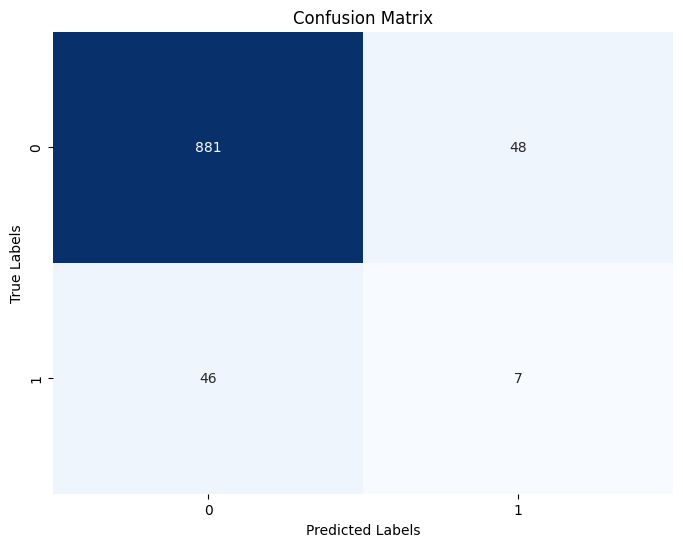

In [60]:
# Membuat Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Menggunakan Algoritma XGBoost untuk percobaan data dengan distribusi tidak normal

In [61]:
from xgboost import XGBClassifier

# Model XGBoost dengan parameter scale_pos_weight
model_xgb = XGBClassifier(
    scale_pos_weight=len(y_train) / sum(y_train),  # Memberikan bobot pada kelas 1
    random_state=42
)
model_xgb.fit(X_train_resampled, y_train_resampled)

# Evaluasi model
y_pred_xgb = model_xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       929
           1       0.11      0.19      0.14        53

    accuracy                           0.88       982
   macro avg       0.53      0.55      0.54       982
weighted avg       0.91      0.88      0.89       982

[[851  78]
 [ 43  10]]
